# **Random Numbers**
examples with uniform and normal distributions in numpy.


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf

In [ ]:
#Example with uniform distribution from -1 to +1
np.random.uniform(-1,+1,(15)) # With 15 random numbers

array([-0.35036925,  0.46625315, -0.19901641, -0.88705269, -0.19249686,
       -0.37465767, -0.76510159,  0.28334368, -0.40534385, -0.49625865,
        0.59950783,  0.52683555,  0.62222346, -0.84380336, -0.7773063 ])

In [ ]:
#Example with normal distribution
#mu = 0 average (centered on 0)
#sigma = 1 standard deviation
np.random.normal(0,1,(7,15)) #this is a 7x15 matrix

array([[ 3.67809998e-01,  2.33185553e-01,  3.90721842e-01,
         3.92699395e-01,  1.59695206e-01, -3.63813675e-01,
         1.49160701e+00, -3.33565062e-02,  3.25368156e-01,
        -1.63180565e+00, -4.94540249e-01, -1.10070602e+00,
         1.06861319e+00, -6.09889725e-01,  1.96404142e-01],
       [ 8.91788327e-03, -5.54841957e-01,  1.24236195e+00,
        -2.14500489e-01, -1.20197204e+00, -1.20549739e+00,
         1.20125546e+00, -3.84752585e-01,  6.34606915e-01,
        -1.94157706e-01,  5.56257572e-01,  2.20049832e+00,
        -2.37736457e-01,  1.00847449e+00, -5.20437011e-04],
       [-1.17829340e+00,  2.66534994e-02, -1.25268534e+00,
        -2.09292955e+00, -1.21769054e+00,  8.70964753e-01,
         4.59189948e-01, -9.11264535e-01, -1.40289596e+00,
        -1.30551052e+00,  6.26035165e-01, -2.50778740e-01,
        -1.11144737e+00, -1.52820942e+00, -2.05028802e-01],
       [ 8.96292781e-02, -4.31048125e-01,  9.83158540e-01,
        -9.45063159e-01,  6.45676232e-01, -1.30148248

# **MONTE CARLO FOR STOCK PRICES**

we start from the definition of daily log return:

$\text{Daily Log Return} = \ln\left(\frac{\text{Price Today}}{\text{Price Yesterday}}\right)$

$e^{\text{Daily Log Return}} = \left(\frac{\text{Price Today}}{\text{Price Yesterday}}\right)$

$\text{Price Yesterday} \cdot e^{\text{Daily Log Return}} = \text{Price Today}$





Unfortunally, we don't have the daily log Return, but we can build a model for calculating it using Statistics and historical data

***Let's define two variables for defining Daily log return:***


*   **Drift:** General tendency of the stocks (They go up or down). Historically, market stocks always tend to go up ("Long-Term Upward Trend")
*   **Volatility:** Determine how stock prices go up or down in a limited period of time. For this, let's use random numbers.


$\text{Drift} \approx \text{Average Daily Log Return} - \frac{\sigma(\text{Daily Log Return})}{2}$

$\sigma$ is the standard deviation, representing the dispersion of data.

The second term is put for not overpredict Drift.

$\text{Volatility} \approx \sigma^2(\text{Daily Log Return}) \cdot \mathbb{Z}$

$\sigma^2$ is the variance which measures the average degree to which each point differs from the mean.

Because Volatility is stochastic, standard deviation is multiplied by a random number ($\mathbb{Z}$) that fluctuates **normally** around 0 and with this range: $[-1, +1]$.

Now we say that:

$\text{Daily log return} \approx \text{Drift} + \text{Volatility}$




We will build a forecast for the price of tomorrow and then we will setup the tool for the next days up to 250 days. At **every step**, we will forecasting volatility using 20 different Z in range [-1,1]

In [ ]:
prices = yf.download("AAPL", start='2009-1-1')['Adj Close'] #Only Adj Close price

[*********************100%%**********************]  1 of 1 completed


<class 'pandas.core.series.Series'>
DatetimeIndex: 3719 entries, 2009-01-02 to 2023-10-11
Series name: Adj Close
Non-Null Count  Dtype  
--------------  -----  
3719 non-null   float64
dtypes: float64(1)
memory usage: 58.1 KB



<Axes: xlabel='Date'>

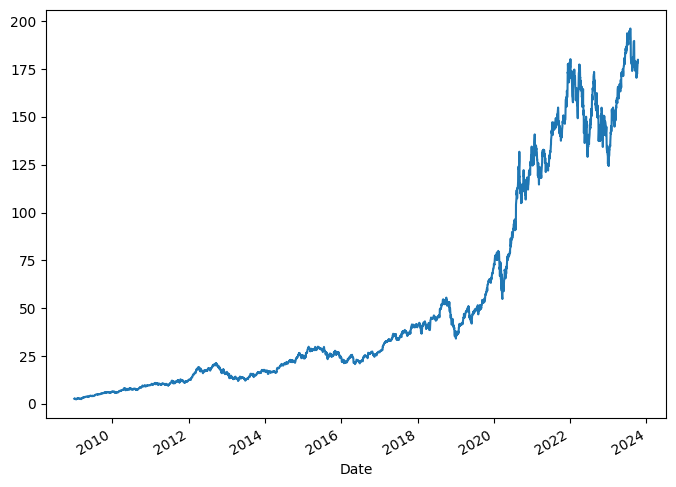

In [ ]:
prices.info() #take a look, also with .tail() and .head()
print()
prices.plot(figsize=(8,6)) #from 2009 (and before) prices of PG stocks are going up

# **Calculate the Daily log return**

In [ ]:
logret = np.log(prices/prices.shift(1)) #Divide all value by the previous
logret #First is NaN, obviously

Date
2009-01-02         NaN
2009-01-05    0.041338
2009-01-06   -0.016631
2009-01-07   -0.021845
2009-01-08    0.018399
                ...   
2023-10-05    0.007172
2023-10-06    0.014643
2023-10-09    0.008416
2023-10-10   -0.003358
2023-10-11    0.007873
Name: Adj Close, Length: 3719, dtype: float64

In [ ]:
#Let's take some values. MEAN, STANDARD DEVIATION, VARIANCE.
logret.mean(), logret.std(), logret.var()
#Robust functions: if they find a NaN, they skip it

(0.0011242273077215492, 0.018102926073399674, 0.0003277159324189737)

In [ ]:
#Let's calculate the Drift
drift = logret.mean() - (logret.var()/2)
drift

0.0009603693415120623

While the drift is a number, volatility is a distribution, because is the standard deciation multiplied by an array of 20 random numbers

In [ ]:
volatility = logret.std() * np.random.uniform(-1,+1,(20))
volatility #We got an array

array([-9.61478663e-03,  9.32747172e-03, -1.92054810e-03,  9.12612254e-03,
        2.21425090e-03,  3.20208221e-04, -6.19153881e-05,  5.33686839e-03,
       -8.36401121e-03,  9.15439410e-03, -1.03006448e-02, -1.68824547e-02,
        4.60679190e-03, -1.09370764e-02, -1.41926923e-02,  1.53809720e-02,
        2.90443821e-04, -1.19419632e-02,  1.05049010e-02,  3.72706277e-03])

In [ ]:
#Let's get the Adj Price of yesterday
yesterday_price = prices.iloc[-1] #index location
yesterday_price


179.8000030517578

In [ ]:
#Price_Yesterday *e^(Daily Log Return) = Price Today
today_price = yesterday_price * np.exp(drift + volatility) #here we have a scalar plus an array!
today_price #the result is an array

array([178.25065283, 181.65930461, 179.62744576, 181.62273134,
       180.37170677, 180.03039839, 179.96161767, 180.93581891,
       178.47374385, 181.62786617, 178.12844007, 176.95988238,
       180.80377013, 178.01510957, 177.43650313, 182.76231442,
       180.02503997, 177.83631439, 181.87332156, 180.64478173])

**BUILDING LONG-TERM PREDICTIONS**

up to 250 days

---



In [ ]:
drift #stays the same (1 number)

0.0009603693415120623

In [ ]:
#Volatility changes: we want 20 random numbers for each day. So we get a matrix 250 x 20
volatility = logret.std() * np.random.uniform(-1,1,(250,100000))
volatility

array([[ 0.01578641,  0.00246021, -0.00957559, ...,  0.00091574,
        -0.01317179, -0.00996503],
       [-0.01278827,  0.01243228,  0.01546082, ...,  0.01100859,
        -0.00727853,  0.0161506 ],
       [-0.00237552, -0.01307892,  0.00623455, ..., -0.01530605,
         0.00238998, -0.00122319],
       ...,
       [-0.01470789, -0.01517315, -0.00507404, ...,  0.01102679,
        -0.01743053,  0.00826731],
       [-0.01341967, -0.00395305, -0.00924322, ...,  0.01714494,
        -0.01626813, -0.01344981],
       [-0.00075029,  0.00880514, -0.00899519, ...,  0.00835316,
         0.00137265, -0.0103432 ]])

In [ ]:
#now the exp^(daily log return) as a matrix 250 x 20
expDailyReturn = np.exp(drift + volatility)
expDailyReturn

array([[1.01688779, 1.00342643, 0.99142179, ..., 1.00187787, 0.98786284,
        0.99103576],
       [0.98824178, 1.01348273, 1.01655675, ..., 1.01204087, 0.99370175,
        1.0172582 ],
       [0.99858585, 0.98795458, 1.00722087, ..., 0.98575673, 1.00335597,
        0.99973721],
       ...,
       [0.98634654, 0.98588775, 0.99589478, ..., 1.0120593 , 0.98366473,
        1.00927038],
       [0.987618  , 0.99701179, 0.99175136, ..., 1.0182702 , 0.98480881,
        0.98758822],
       [1.0002101 , 1.00981335, 0.99199737, ..., 1.00935703, 1.00233574,
        0.99066105]])

**Let's transform expDailyReturn Matrix into a dataframe and put the start price in the row 0**

In [ ]:
startPrice = prices.iloc[-1]
startPrice

179.8000030517578

In [ ]:
EDR = pd.DataFrame(expDailyReturn)
# Shift all rows downward by one, leaving the first row empty
EDR = EDR.shift(1, fill_value=startPrice)
EDR

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
0,179.800003,179.800003,179.800003,179.800003,179.800003,179.800003,179.800003,179.800003,179.800003,179.800003,...,179.800003,179.800003,179.800003,179.800003,179.800003,179.800003,179.800003,179.800003,179.800003,179.800003
1,1.016888,1.003426,0.991422,1.003994,0.985961,0.992377,1.015485,1.002850,0.983238,0.991414,...,1.012359,0.989413,0.989892,1.013870,1.017438,0.996430,0.994524,1.001878,0.987863,0.991036
2,0.988242,1.013483,1.016557,0.986164,1.008778,1.008327,0.998449,1.007963,1.002467,1.009847,...,1.009660,1.012751,1.016567,0.999775,1.016264,0.989341,0.996029,1.012041,0.993702,1.017258
3,0.998586,0.987955,1.007221,0.984567,1.004683,1.003050,1.012269,0.997092,0.997667,1.004859,...,0.989162,0.999573,0.988761,1.008691,1.010815,1.003649,1.013435,0.985757,1.003356,0.999737
4,1.017440,1.003355,0.998846,0.993463,1.006926,1.010542,0.989153,1.013432,0.997141,1.011397,...,0.994621,1.014023,1.013244,1.008038,1.000427,1.005835,1.005737,0.987585,1.008609,1.016952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1.012414,0.995696,1.014643,0.991731,1.014575,1.005468,0.986074,1.008211,0.984862,0.984342,...,0.989430,0.999417,0.993050,0.992013,0.986163,0.986087,1.004782,0.986483,1.007871,0.995542
246,1.007126,0.987038,0.987177,0.992772,0.991099,0.999254,1.012588,1.003718,0.992222,1.000493,...,0.989243,0.993631,0.996254,1.016309,1.001123,1.008018,0.999631,0.998561,0.992049,1.005074
247,1.004564,0.989340,0.994888,1.008046,1.003291,1.004717,1.017992,1.012685,1.018015,0.995382,...,1.003861,1.001615,0.995697,1.013964,0.989781,0.988598,1.012964,0.997149,1.006493,1.007117
248,0.986347,0.985888,0.995895,1.007819,1.002512,0.991556,0.983272,0.988915,0.988977,1.004408,...,1.018049,0.989808,1.005003,0.997035,1.014592,1.017847,1.003575,1.012059,0.983665,1.009270


In [ ]:
#Now let's build a little while loop for multiplying all the values with the previous.
i = 0
j = 1
while j <= 249:
  EDR.iloc[j] = EDR.iloc[i] * EDR.iloc[j]
  j += 1
  i += 1

EDR

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
0,179.800003,179.800003,179.800003,179.800003,179.800003,179.800003,179.800003,179.800003,179.800003,179.800003,...,179.800003,179.800003,179.800003,179.800003,179.800003,179.800003,179.800003,179.800003,179.800003,179.800003
1,182.836428,180.416075,178.257640,180.518116,177.275835,178.429436,182.584199,180.312350,176.786280,178.256208,...,182.022219,177.896391,177.982528,182.293792,182.935369,179.158046,178.815437,180.137645,177.617742,178.188233
2,180.686597,182.848577,181.209008,178.020479,178.832035,179.915220,182.301014,181.748185,177.222445,180.011571,...,183.780543,180.164774,180.931195,182.252751,185.910642,177.248466,178.105293,182.306659,176.499061,181.263440
3,180.431079,180.646090,182.517495,175.273075,179.669502,180.463904,184.537647,181.219642,176.808980,180.886333,...,181.788789,180.087879,178.897763,183.836680,187.921232,177.895226,180.498120,179.710015,177.091387,181.215807
4,183.577868,181.252188,182.306881,174.127262,180.913917,182.366285,182.535886,183.653769,176.303471,182.947971,...,180.810912,182.613299,181.267097,185.314405,188.001536,178.933254,181.533703,177.478993,178.615957,184.287814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,234.966802,222.757361,218.062257,196.868403,278.421141,210.319100,195.695017,182.401586,292.405481,206.285362,...,198.723484,266.926579,210.729739,256.639101,234.160217,231.777707,212.464450,290.402379,225.012969,234.418487
246,236.641128,219.870072,215.266140,195.445402,275.942885,210.162164,198.158420,183.079679,290.131275,206.387031,...,196.585856,265.226555,209.940372,260.824594,234.423280,233.636052,212.386040,289.984364,223.223894,235.607874
247,237.721174,217.526327,214.165747,197.017906,276.850929,211.153557,201.723687,185.402019,295.357996,205.433849,...,197.344950,265.654844,209.037033,264.466811,232.027664,230.972066,215.139336,289.157502,224.673278,237.284618
248,234.475458,214.456540,213.286550,198.558300,277.546348,209.370474,198.349201,183.346787,292.102205,206.339429,...,200.906907,262.947360,210.082876,263.682662,235.413317,235.094219,215.908422,292.644538,221.003179,239.484337


**Now the graph is a little bit messy. So let's calculate a mean for all the simulations.**

<Axes: >

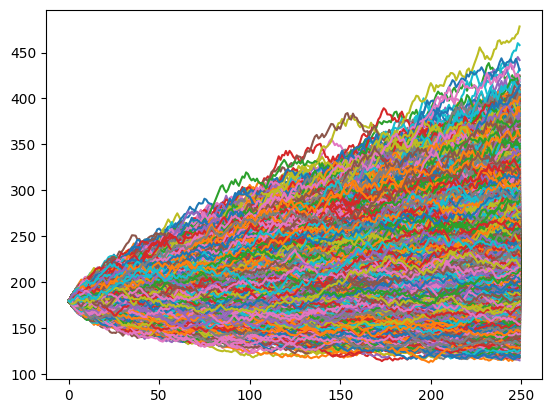

In [ ]:
EDR.plot(kind='line', legend=False)

In [ ]:
#Calculate the mean fr every row
EDR_row_mean = EDR.mean(axis=1) #axis=1 is the row part of the matrix, gives back a series
EDR_row_mean

0      179.800003
1      179.982133
2      180.156622
3      180.341432
4      180.528377
          ...    
245    230.485191
246    230.728356
247    230.961074
248    231.190554
249    231.431152
Length: 250, dtype: float64

<Axes: >

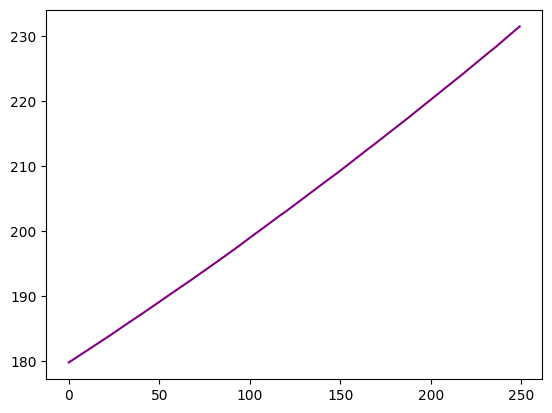

In [ ]:
#Now we can finally plot the result:
EDR_row_mean.plot(kind='line', color='purple')

From Today to 250 days the expected value of the stock PG is around 230 USD (Adj Closed)